In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import cv2
print(tf.__version__)

2.10.0


In [2]:
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 515994945209812702
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1749391771
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 688832201773263931
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

#DATASETİ YÜKLEMEK 

In [3]:
os.chdir("./dataset/hands")
image_list = os.listdir()
print("example : ",image_list[0:5])

example :  ['10000_palmar left.jpg', '1000_dorsal right.jpg', '1001_dorsal right.jpg', '1002_dorsal right.jpg', '1003_dorsal right.jpg']


In [3]:
image_list

['10000_palmar left.jpg',
 '1000_dorsal right.jpg',
 '1001_dorsal right.jpg',
 '1002_dorsal right.jpg',
 '1003_dorsal right.jpg',
 '1004_dorsal right.jpg',
 '1005_dorsal right.jpg',
 '1006_dorsal right.jpg',
 '1007_dorsal right.jpg',
 '1008_palmar right.jpg',
 '1009_palmar right.jpg',
 '100_dorsal right.jpg',
 '1010_palmar right.jpg',
 '1011_palmar right.jpg',
 '1012_palmar right.jpg',
 '1013_palmar right.jpg',
 '1014_palmar right.jpg',
 '1015_palmar right.jpg',
 '1016_dorsal left.jpg',
 '1017_dorsal left.jpg',
 '1018_dorsal left.jpg',
 '1019_dorsal left.jpg',
 '101_dorsal right.jpg',
 '1020_dorsal left.jpg',
 '1021_dorsal left.jpg',
 '1022_palmar left.jpg',
 '1023_palmar left.jpg',
 '1024_palmar left.jpg',
 '1025_palmar left.jpg',
 '1026_palmar left.jpg',
 '1027_palmar left.jpg',
 '1028_palmar left.jpg',
 '1029_dorsal right.jpg',
 '102_dorsal right.jpg',
 '1030_dorsal right.jpg',
 '1031_dorsal right.jpg',
 '1032_dorsal right.jpg',
 '1033_dorsal right.jpg',
 '1034_dorsal right.jpg',
 '

In [4]:
def import_the_photos_from_names(list_of_photo_names,WIDTH,HEIGHT):
    #isimlerinden fotoğrafları içeri aktar
    photos = []
    sayac = 1
    for im in list_of_photo_names:
        im = np.array(Image.open(im).resize((WIDTH,HEIGHT)))
        print("importing image: ",sayac)
        sayac+=1
        photos.append(im)
    return photos

def onehot_labels(values):
    from sklearn.preprocessing import LabelEncoder,OneHotEncoder
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse = False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded


x_data = import_the_photos_from_names(image_list,56,56)
x_data = np.array(x_data)
x_data = (x_data - 127.5) / 127.5


y_data =  [i.split("_")[1] for i in image_list]
y_data = np.array(y_data)
y_data = onehot_labels(y_data)
print("example : ",y_data[0:15])
os.chdir("..")

importing image:  1
importing image:  2
importing image:  3
importing image:  4
importing image:  5
importing image:  6
importing image:  7
importing image:  8
importing image:  9
importing image:  10
importing image:  11
importing image:  12
importing image:  13
importing image:  14
importing image:  15
importing image:  16
importing image:  17
importing image:  18
importing image:  19
importing image:  20
importing image:  21
importing image:  22
importing image:  23
importing image:  24
importing image:  25
importing image:  26
importing image:  27
importing image:  28
importing image:  29
importing image:  30
importing image:  31
importing image:  32
importing image:  33
importing image:  34
importing image:  35
importing image:  36
importing image:  37
importing image:  38
importing image:  39
importing image:  40
importing image:  41
importing image:  42
importing image:  43
importing image:  44
importing image:  45
importing image:  46
importing image:  47
importing image:  48
i

importing image:  385
importing image:  386
importing image:  387
importing image:  388
importing image:  389
importing image:  390
importing image:  391
importing image:  392
importing image:  393
importing image:  394
importing image:  395
importing image:  396
importing image:  397
importing image:  398
importing image:  399
importing image:  400
importing image:  401
importing image:  402
importing image:  403
importing image:  404
importing image:  405
importing image:  406
importing image:  407
importing image:  408
importing image:  409
importing image:  410
importing image:  411
importing image:  412
importing image:  413
importing image:  414
importing image:  415
importing image:  416
importing image:  417
importing image:  418
importing image:  419
importing image:  420
importing image:  421
importing image:  422
importing image:  423
importing image:  424
importing image:  425
importing image:  426
importing image:  427
importing image:  428
importing image:  429
importing 

importing image:  761
importing image:  762
importing image:  763
importing image:  764
importing image:  765
importing image:  766
importing image:  767
importing image:  768
importing image:  769
importing image:  770
importing image:  771
importing image:  772
importing image:  773
importing image:  774
importing image:  775
importing image:  776
importing image:  777
importing image:  778
importing image:  779
importing image:  780
importing image:  781
importing image:  782
importing image:  783
importing image:  784
importing image:  785
importing image:  786
importing image:  787
importing image:  788
importing image:  789
importing image:  790
importing image:  791
importing image:  792
importing image:  793
importing image:  794
importing image:  795
importing image:  796
importing image:  797
importing image:  798
importing image:  799
importing image:  800
importing image:  801
importing image:  802
importing image:  803
importing image:  804
importing image:  805
importing 

importing image:  1129
importing image:  1130
importing image:  1131
importing image:  1132
importing image:  1133
importing image:  1134
importing image:  1135
importing image:  1136
importing image:  1137
importing image:  1138
importing image:  1139
importing image:  1140
importing image:  1141
importing image:  1142
importing image:  1143
importing image:  1144
importing image:  1145
importing image:  1146
importing image:  1147
importing image:  1148
importing image:  1149
importing image:  1150
importing image:  1151
importing image:  1152
importing image:  1153
importing image:  1154
importing image:  1155
importing image:  1156
importing image:  1157
importing image:  1158
importing image:  1159
importing image:  1160
importing image:  1161
importing image:  1162
importing image:  1163
importing image:  1164
importing image:  1165
importing image:  1166
importing image:  1167
importing image:  1168
importing image:  1169
importing image:  1170
importing image:  1171
importing i

importing image:  1486
importing image:  1487
importing image:  1488
importing image:  1489
importing image:  1490
importing image:  1491
importing image:  1492
importing image:  1493
importing image:  1494
importing image:  1495
importing image:  1496
importing image:  1497
importing image:  1498
importing image:  1499
importing image:  1500
importing image:  1501
importing image:  1502
importing image:  1503
importing image:  1504
importing image:  1505
importing image:  1506
importing image:  1507
importing image:  1508
importing image:  1509
importing image:  1510
importing image:  1511
importing image:  1512
importing image:  1513
importing image:  1514
importing image:  1515
importing image:  1516
importing image:  1517
importing image:  1518
importing image:  1519
importing image:  1520
importing image:  1521
importing image:  1522
importing image:  1523
importing image:  1524
importing image:  1525
importing image:  1526
importing image:  1527
importing image:  1528
importing i

importing image:  1850
importing image:  1851
importing image:  1852
importing image:  1853
importing image:  1854
importing image:  1855
importing image:  1856
importing image:  1857
importing image:  1858
importing image:  1859
importing image:  1860
importing image:  1861
importing image:  1862
importing image:  1863
importing image:  1864
importing image:  1865
importing image:  1866
importing image:  1867
importing image:  1868
importing image:  1869
importing image:  1870
importing image:  1871
importing image:  1872
importing image:  1873
importing image:  1874
importing image:  1875
importing image:  1876
importing image:  1877
importing image:  1878
importing image:  1879
importing image:  1880
importing image:  1881
importing image:  1882
importing image:  1883
importing image:  1884
importing image:  1885
importing image:  1886
importing image:  1887
importing image:  1888
importing image:  1889
importing image:  1890
importing image:  1891
importing image:  1892
importing i

importing image:  2211
importing image:  2212
importing image:  2213
importing image:  2214
importing image:  2215
importing image:  2216
importing image:  2217
importing image:  2218
importing image:  2219
importing image:  2220
importing image:  2221
importing image:  2222
importing image:  2223
importing image:  2224
importing image:  2225
importing image:  2226
importing image:  2227
importing image:  2228
importing image:  2229
importing image:  2230
importing image:  2231
importing image:  2232
importing image:  2233
importing image:  2234
importing image:  2235
importing image:  2236
importing image:  2237
importing image:  2238
importing image:  2239
importing image:  2240
importing image:  2241
importing image:  2242
importing image:  2243
importing image:  2244
importing image:  2245
importing image:  2246
importing image:  2247
importing image:  2248
importing image:  2249
importing image:  2250
importing image:  2251
importing image:  2252
importing image:  2253
importing i

importing image:  2572
importing image:  2573
importing image:  2574
importing image:  2575
importing image:  2576
importing image:  2577
importing image:  2578
importing image:  2579
importing image:  2580
importing image:  2581
importing image:  2582
importing image:  2583
importing image:  2584
importing image:  2585
importing image:  2586
importing image:  2587
importing image:  2588
importing image:  2589
importing image:  2590
importing image:  2591
importing image:  2592
importing image:  2593
importing image:  2594
importing image:  2595
importing image:  2596
importing image:  2597
importing image:  2598
importing image:  2599
importing image:  2600
importing image:  2601
importing image:  2602
importing image:  2603
importing image:  2604
importing image:  2605
importing image:  2606
importing image:  2607
importing image:  2608
importing image:  2609
importing image:  2610
importing image:  2611
importing image:  2612
importing image:  2613
importing image:  2614
importing i

importing image:  2932
importing image:  2933
importing image:  2934
importing image:  2935
importing image:  2936
importing image:  2937
importing image:  2938
importing image:  2939
importing image:  2940
importing image:  2941
importing image:  2942
importing image:  2943
importing image:  2944
importing image:  2945
importing image:  2946
importing image:  2947
importing image:  2948
importing image:  2949
importing image:  2950
importing image:  2951
importing image:  2952
importing image:  2953
importing image:  2954
importing image:  2955
importing image:  2956
importing image:  2957
importing image:  2958
importing image:  2959
importing image:  2960
importing image:  2961
importing image:  2962
importing image:  2963
importing image:  2964
importing image:  2965
importing image:  2966
importing image:  2967
importing image:  2968
importing image:  2969
importing image:  2970
importing image:  2971
importing image:  2972
importing image:  2973
importing image:  2974
importing i

importing image:  3299
importing image:  3300
importing image:  3301
importing image:  3302
importing image:  3303
importing image:  3304
importing image:  3305
importing image:  3306
importing image:  3307
importing image:  3308
importing image:  3309
importing image:  3310
importing image:  3311
importing image:  3312
importing image:  3313
importing image:  3314
importing image:  3315
importing image:  3316
importing image:  3317
importing image:  3318
importing image:  3319
importing image:  3320
importing image:  3321
importing image:  3322
importing image:  3323
importing image:  3324
importing image:  3325
importing image:  3326
importing image:  3327
importing image:  3328
importing image:  3329
importing image:  3330
importing image:  3331
importing image:  3332
importing image:  3333
importing image:  3334
importing image:  3335
importing image:  3336
importing image:  3337
importing image:  3338
importing image:  3339
importing image:  3340
importing image:  3341
importing i

importing image:  3665
importing image:  3666
importing image:  3667
importing image:  3668
importing image:  3669
importing image:  3670
importing image:  3671
importing image:  3672
importing image:  3673
importing image:  3674
importing image:  3675
importing image:  3676
importing image:  3677
importing image:  3678
importing image:  3679
importing image:  3680
importing image:  3681
importing image:  3682
importing image:  3683
importing image:  3684
importing image:  3685
importing image:  3686
importing image:  3687
importing image:  3688
importing image:  3689
importing image:  3690
importing image:  3691
importing image:  3692
importing image:  3693
importing image:  3694
importing image:  3695
importing image:  3696
importing image:  3697
importing image:  3698
importing image:  3699
importing image:  3700
importing image:  3701
importing image:  3702
importing image:  3703
importing image:  3704
importing image:  3705
importing image:  3706
importing image:  3707
importing i

importing image:  4032
importing image:  4033
importing image:  4034
importing image:  4035
importing image:  4036
importing image:  4037
importing image:  4038
importing image:  4039
importing image:  4040
importing image:  4041
importing image:  4042
importing image:  4043
importing image:  4044
importing image:  4045
importing image:  4046
importing image:  4047
importing image:  4048
importing image:  4049
importing image:  4050
importing image:  4051
importing image:  4052
importing image:  4053
importing image:  4054
importing image:  4055
importing image:  4056
importing image:  4057
importing image:  4058
importing image:  4059
importing image:  4060
importing image:  4061
importing image:  4062
importing image:  4063
importing image:  4064
importing image:  4065
importing image:  4066
importing image:  4067
importing image:  4068
importing image:  4069
importing image:  4070
importing image:  4071
importing image:  4072
importing image:  4073
importing image:  4074
importing i

importing image:  4392
importing image:  4393
importing image:  4394
importing image:  4395
importing image:  4396
importing image:  4397
importing image:  4398
importing image:  4399
importing image:  4400
importing image:  4401
importing image:  4402
importing image:  4403
importing image:  4404
importing image:  4405
importing image:  4406
importing image:  4407
importing image:  4408
importing image:  4409
importing image:  4410
importing image:  4411
importing image:  4412
importing image:  4413
importing image:  4414
importing image:  4415
importing image:  4416
importing image:  4417
importing image:  4418
importing image:  4419
importing image:  4420
importing image:  4421
importing image:  4422
importing image:  4423
importing image:  4424
importing image:  4425
importing image:  4426
importing image:  4427
importing image:  4428
importing image:  4429
importing image:  4430
importing image:  4431
importing image:  4432
importing image:  4433
importing image:  4434
importing i

importing image:  4749
importing image:  4750
importing image:  4751
importing image:  4752
importing image:  4753
importing image:  4754
importing image:  4755
importing image:  4756
importing image:  4757
importing image:  4758
importing image:  4759
importing image:  4760
importing image:  4761
importing image:  4762
importing image:  4763
importing image:  4764
importing image:  4765
importing image:  4766
importing image:  4767
importing image:  4768
importing image:  4769
importing image:  4770
importing image:  4771
importing image:  4772
importing image:  4773
importing image:  4774
importing image:  4775
importing image:  4776
importing image:  4777
importing image:  4778
importing image:  4779
importing image:  4780
importing image:  4781
importing image:  4782
importing image:  4783
importing image:  4784
importing image:  4785
importing image:  4786
importing image:  4787
importing image:  4788
importing image:  4789
importing image:  4790
importing image:  4791
importing i

importing image:  5113
importing image:  5114
importing image:  5115
importing image:  5116
importing image:  5117
importing image:  5118
importing image:  5119
importing image:  5120
importing image:  5121
importing image:  5122
importing image:  5123
importing image:  5124
importing image:  5125
importing image:  5126
importing image:  5127
importing image:  5128
importing image:  5129
importing image:  5130
importing image:  5131
importing image:  5132
importing image:  5133
importing image:  5134
importing image:  5135
importing image:  5136
importing image:  5137
importing image:  5138
importing image:  5139
importing image:  5140
importing image:  5141
importing image:  5142
importing image:  5143
importing image:  5144
importing image:  5145
importing image:  5146
importing image:  5147
importing image:  5148
importing image:  5149
importing image:  5150
importing image:  5151
importing image:  5152
importing image:  5153
importing image:  5154
importing image:  5155
importing i

importing image:  5481
importing image:  5482
importing image:  5483
importing image:  5484
importing image:  5485
importing image:  5486
importing image:  5487
importing image:  5488
importing image:  5489
importing image:  5490
importing image:  5491
importing image:  5492
importing image:  5493
importing image:  5494
importing image:  5495
importing image:  5496
importing image:  5497
importing image:  5498
importing image:  5499
importing image:  5500
importing image:  5501
importing image:  5502
importing image:  5503
importing image:  5504
importing image:  5505
importing image:  5506
importing image:  5507
importing image:  5508
importing image:  5509
importing image:  5510
importing image:  5511
importing image:  5512
importing image:  5513
importing image:  5514
importing image:  5515
importing image:  5516
importing image:  5517
importing image:  5518
importing image:  5519
importing image:  5520
importing image:  5521
importing image:  5522
importing image:  5523
importing i

importing image:  5846
importing image:  5847
importing image:  5848
importing image:  5849
importing image:  5850
importing image:  5851
importing image:  5852
importing image:  5853
importing image:  5854
importing image:  5855
importing image:  5856
importing image:  5857
importing image:  5858
importing image:  5859
importing image:  5860
importing image:  5861
importing image:  5862
importing image:  5863
importing image:  5864
importing image:  5865
importing image:  5866
importing image:  5867
importing image:  5868
importing image:  5869
importing image:  5870
importing image:  5871
importing image:  5872
importing image:  5873
importing image:  5874
importing image:  5875
importing image:  5876
importing image:  5877
importing image:  5878
importing image:  5879
importing image:  5880
importing image:  5881
importing image:  5882
importing image:  5883
importing image:  5884
importing image:  5885
importing image:  5886
importing image:  5887
importing image:  5888
importing i

importing image:  6208
importing image:  6209
importing image:  6210
importing image:  6211
importing image:  6212
importing image:  6213
importing image:  6214
importing image:  6215
importing image:  6216
importing image:  6217
importing image:  6218
importing image:  6219
importing image:  6220
importing image:  6221
importing image:  6222
importing image:  6223
importing image:  6224
importing image:  6225
importing image:  6226
importing image:  6227
importing image:  6228
importing image:  6229
importing image:  6230
importing image:  6231
importing image:  6232
importing image:  6233
importing image:  6234
importing image:  6235
importing image:  6236
importing image:  6237
importing image:  6238
importing image:  6239
importing image:  6240
importing image:  6241
importing image:  6242
importing image:  6243
importing image:  6244
importing image:  6245
importing image:  6246
importing image:  6247
importing image:  6248
importing image:  6249
importing image:  6250
importing i

importing image:  6569
importing image:  6570
importing image:  6571
importing image:  6572
importing image:  6573
importing image:  6574
importing image:  6575
importing image:  6576
importing image:  6577
importing image:  6578
importing image:  6579
importing image:  6580
importing image:  6581
importing image:  6582
importing image:  6583
importing image:  6584
importing image:  6585
importing image:  6586
importing image:  6587
importing image:  6588
importing image:  6589
importing image:  6590
importing image:  6591
importing image:  6592
importing image:  6593
importing image:  6594
importing image:  6595
importing image:  6596
importing image:  6597
importing image:  6598
importing image:  6599
importing image:  6600
importing image:  6601
importing image:  6602
importing image:  6603
importing image:  6604
importing image:  6605
importing image:  6606
importing image:  6607
importing image:  6608
importing image:  6609
importing image:  6610
importing image:  6611
importing i

importing image:  6936
importing image:  6937
importing image:  6938
importing image:  6939
importing image:  6940
importing image:  6941
importing image:  6942
importing image:  6943
importing image:  6944
importing image:  6945
importing image:  6946
importing image:  6947
importing image:  6948
importing image:  6949
importing image:  6950
importing image:  6951
importing image:  6952
importing image:  6953
importing image:  6954
importing image:  6955
importing image:  6956
importing image:  6957
importing image:  6958
importing image:  6959
importing image:  6960
importing image:  6961
importing image:  6962
importing image:  6963
importing image:  6964
importing image:  6965
importing image:  6966
importing image:  6967
importing image:  6968
importing image:  6969
importing image:  6970
importing image:  6971
importing image:  6972
importing image:  6973
importing image:  6974
importing image:  6975
importing image:  6976
importing image:  6977
importing image:  6978
importing i

importing image:  7294
importing image:  7295
importing image:  7296
importing image:  7297
importing image:  7298
importing image:  7299
importing image:  7300
importing image:  7301
importing image:  7302
importing image:  7303
importing image:  7304
importing image:  7305
importing image:  7306
importing image:  7307
importing image:  7308
importing image:  7309
importing image:  7310
importing image:  7311
importing image:  7312
importing image:  7313
importing image:  7314
importing image:  7315
importing image:  7316
importing image:  7317
importing image:  7318
importing image:  7319
importing image:  7320
importing image:  7321
importing image:  7322
importing image:  7323
importing image:  7324
importing image:  7325
importing image:  7326
importing image:  7327
importing image:  7328
importing image:  7329
importing image:  7330
importing image:  7331
importing image:  7332
importing image:  7333
importing image:  7334
importing image:  7335
importing image:  7336
importing i

importing image:  7660
importing image:  7661
importing image:  7662
importing image:  7663
importing image:  7664
importing image:  7665
importing image:  7666
importing image:  7667
importing image:  7668
importing image:  7669
importing image:  7670
importing image:  7671
importing image:  7672
importing image:  7673
importing image:  7674
importing image:  7675
importing image:  7676
importing image:  7677
importing image:  7678
importing image:  7679
importing image:  7680
importing image:  7681
importing image:  7682
importing image:  7683
importing image:  7684
importing image:  7685
importing image:  7686
importing image:  7687
importing image:  7688
importing image:  7689
importing image:  7690
importing image:  7691
importing image:  7692
importing image:  7693
importing image:  7694
importing image:  7695
importing image:  7696
importing image:  7697
importing image:  7698
importing image:  7699
importing image:  7700
importing image:  7701
importing image:  7702
importing i

importing image:  8023
importing image:  8024
importing image:  8025
importing image:  8026
importing image:  8027
importing image:  8028
importing image:  8029
importing image:  8030
importing image:  8031
importing image:  8032
importing image:  8033
importing image:  8034
importing image:  8035
importing image:  8036
importing image:  8037
importing image:  8038
importing image:  8039
importing image:  8040
importing image:  8041
importing image:  8042
importing image:  8043
importing image:  8044
importing image:  8045
importing image:  8046
importing image:  8047
importing image:  8048
importing image:  8049
importing image:  8050
importing image:  8051
importing image:  8052
importing image:  8053
importing image:  8054
importing image:  8055
importing image:  8056
importing image:  8057
importing image:  8058
importing image:  8059
importing image:  8060
importing image:  8061
importing image:  8062
importing image:  8063
importing image:  8064
importing image:  8065
importing i

importing image:  8381
importing image:  8382
importing image:  8383
importing image:  8384
importing image:  8385
importing image:  8386
importing image:  8387
importing image:  8388
importing image:  8389
importing image:  8390
importing image:  8391
importing image:  8392
importing image:  8393
importing image:  8394
importing image:  8395
importing image:  8396
importing image:  8397
importing image:  8398
importing image:  8399
importing image:  8400
importing image:  8401
importing image:  8402
importing image:  8403
importing image:  8404
importing image:  8405
importing image:  8406
importing image:  8407
importing image:  8408
importing image:  8409
importing image:  8410
importing image:  8411
importing image:  8412
importing image:  8413
importing image:  8414
importing image:  8415
importing image:  8416
importing image:  8417
importing image:  8418
importing image:  8419
importing image:  8420
importing image:  8421
importing image:  8422
importing image:  8423
importing i

importing image:  8744
importing image:  8745
importing image:  8746
importing image:  8747
importing image:  8748
importing image:  8749
importing image:  8750
importing image:  8751
importing image:  8752
importing image:  8753
importing image:  8754
importing image:  8755
importing image:  8756
importing image:  8757
importing image:  8758
importing image:  8759
importing image:  8760
importing image:  8761
importing image:  8762
importing image:  8763
importing image:  8764
importing image:  8765
importing image:  8766
importing image:  8767
importing image:  8768
importing image:  8769
importing image:  8770
importing image:  8771
importing image:  8772
importing image:  8773
importing image:  8774
importing image:  8775
importing image:  8776
importing image:  8777
importing image:  8778
importing image:  8779
importing image:  8780
importing image:  8781
importing image:  8782
importing image:  8783
importing image:  8784
importing image:  8785
importing image:  8786
importing i

importing image:  9103
importing image:  9104
importing image:  9105
importing image:  9106
importing image:  9107
importing image:  9108
importing image:  9109
importing image:  9110
importing image:  9111
importing image:  9112
importing image:  9113
importing image:  9114
importing image:  9115
importing image:  9116
importing image:  9117
importing image:  9118
importing image:  9119
importing image:  9120
importing image:  9121
importing image:  9122
importing image:  9123
importing image:  9124
importing image:  9125
importing image:  9126
importing image:  9127
importing image:  9128
importing image:  9129
importing image:  9130
importing image:  9131
importing image:  9132
importing image:  9133
importing image:  9134
importing image:  9135
importing image:  9136
importing image:  9137
importing image:  9138
importing image:  9139
importing image:  9140
importing image:  9141
importing image:  9142
importing image:  9143
importing image:  9144
importing image:  9145
importing i

importing image:  9460
importing image:  9461
importing image:  9462
importing image:  9463
importing image:  9464
importing image:  9465
importing image:  9466
importing image:  9467
importing image:  9468
importing image:  9469
importing image:  9470
importing image:  9471
importing image:  9472
importing image:  9473
importing image:  9474
importing image:  9475
importing image:  9476
importing image:  9477
importing image:  9478
importing image:  9479
importing image:  9480
importing image:  9481
importing image:  9482
importing image:  9483
importing image:  9484
importing image:  9485
importing image:  9486
importing image:  9487
importing image:  9488
importing image:  9489
importing image:  9490
importing image:  9491
importing image:  9492
importing image:  9493
importing image:  9494
importing image:  9495
importing image:  9496
importing image:  9497
importing image:  9498
importing image:  9499
importing image:  9500
importing image:  9501
importing image:  9502
importing i

importing image:  9820
importing image:  9821
importing image:  9822
importing image:  9823
importing image:  9824
importing image:  9825
importing image:  9826
importing image:  9827
importing image:  9828
importing image:  9829
importing image:  9830
importing image:  9831
importing image:  9832
importing image:  9833
importing image:  9834
importing image:  9835
importing image:  9836
importing image:  9837
importing image:  9838
importing image:  9839
importing image:  9840
importing image:  9841
importing image:  9842
importing image:  9843
importing image:  9844
importing image:  9845
importing image:  9846
importing image:  9847
importing image:  9848
importing image:  9849
importing image:  9850
importing image:  9851
importing image:  9852
importing image:  9853
importing image:  9854
importing image:  9855
importing image:  9856
importing image:  9857
importing image:  9858
importing image:  9859
importing image:  9860
importing image:  9861
importing image:  9862
importing i

C:\Users\Asus\anaconda3\envs\GPU\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,train_size=0.9)


buffer_size = 10000  #Mükemmel karıştırma (shuffle) için buffer_size parametresini eğitim veri setinin uzunluğuna eşit olarak ayarlamamız gerek
batch_size = 250
random_noise_size = 500

x_train = x_train.astype('float32')
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(buffer_size).batch(batch_size)


GENERATOR

In [6]:

generator = keras.models.Sequential([
    
    keras.layers.Dense(56*56*3,input_shape=[random_noise_size]),
    
    keras.layers.Reshape([7,7,192]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64,(5,5),(2,2),padding="same",activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(32,(5,5),(2,2),padding="same",activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(16,(5,5),(1,1),padding="same",activation="tanh"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(3,(5,5),(2,2),padding="same",activation="tanh")
])

generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9408)              4713408   
                                                                 
 reshape (Reshape)           (None, 7, 7, 192)         0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 192)        768       
 ormalization)                                                   
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       307264    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                        

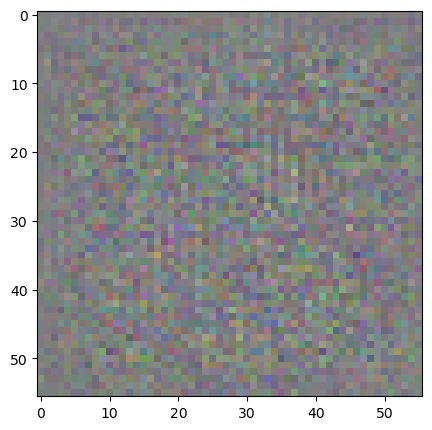

In [7]:
noise = tf.random.normal(shape=[1,random_noise_size])
fake_image = generator(noise)

fake_image = fake_image * 127.5 + 127.5
fake_image = np.array(fake_image).astype("int32")

fake_image = tf.reshape(fake_image,[56,56,3])
plt.figure(figsize=(5,5))
plt.imshow(fake_image)

In [8]:
discriminator = keras.models.Sequential([
    
    keras.layers.Conv2D(16,(5,5),(2,2),padding="same",input_shape=[56,56,3]),
    keras.layers.LeakyReLU(0.2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(48,(3,3),(2,2),padding="same"),
    keras.layers.LeakyReLU(0.2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(128,(3,3),(2,2),padding="same"),
    keras.layers.LeakyReLU(0.2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(192,(3,3),(2,2),padding="same"),
    keras.layers.LeakyReLU(0.2),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(192),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(192),
    keras.layers.Flatten(),
    keras.layers.Dense(1,activation="sigmoid")
])

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        1216      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 16)        0         
                                                                 
 dropout (Dropout)           (None, 28, 28, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        6960      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 48)        0         
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 48)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)        

In [9]:
#test discriminator
decision = discriminator(tf.reshape(fake_image,shape=[-1,fake_image.shape[0],fake_image.shape[1],fake_image.shape[2]]))
print("\n \n desicion :",decision)


 
 desicion : tf.Tensor([[0.12996097]], shape=(1, 1), dtype=float32)


MODELİ COMPİLE ETMEK

In [10]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan = keras.models.Sequential([generator, discriminator])
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

EĞİTİMİN GÖRSELLEŞTİRİLMESİ

In [11]:
from IPython import display
from tqdm import tqdm
seed = tf.random.normal(shape=[batch_size, random_noise_size])

In [12]:
## Kaynak: https://www.tensorflow.org/tutorials/generative/dcgan#create_a_gif
def generate_and_save_images(model, epoch, test_input):
  # 'Eğitim' False seçeneğine ayarlandı.
  # Böylece tüm katmanlar çıkarım modunda (batchnorm) çalışır.
  test_input = tf.reshape(test_input,shape=(batch_size,random_noise_size))
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(10,10))

  for i in range(25):
      plt.subplot(5, 5, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='binary')
      
      plt.axis('off')
  
  plt.figure(figsize=(5,5))
  plt.xticks([])
  plt.yticks([])

  prediction = predictions[0,:,:,0] * 127.5 + 127.5
  plt.imshow(prediction)

  if epoch % 50 == 0 and epoch > 0:
    
      plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()
    
    
    

In [13]:
from tqdm import tqdm
def train_dcgan(gan, dataset, batch_size, num_features, epochs=5):
    generator, discriminator = gan.layers
    for epoch in tqdm(range(epochs)):
        print("Epoch {}/{}".format(epoch + 1, epochs))
        for X_batch in dataset:
            noise = tf.random.normal(shape=[batch_size, num_features])
            generated_images = generator(noise)
            #X_batch = tf.reshape(X_batch,shape=[-1,56,56,3])
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            noise = tf.random.normal(shape=[batch_size, num_features])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
            # Üretilen görüntüleri ekrana yazdırıp dosyaya kaydedelim
            if epoch % 100  == 0 and epoch > 0:
                gan.save(f"model_{epoch}.h5")
        display.clear_output(wait=True)
        generate_and_save_images(generator, epoch + 1, seed)
        
    display.clear_output(wait=True)
    generate_and_save_images(generator, epochs, seed)

In [14]:
#x_train = x_train.reshape(x_train.shape[0], 56*56).astype('float32')

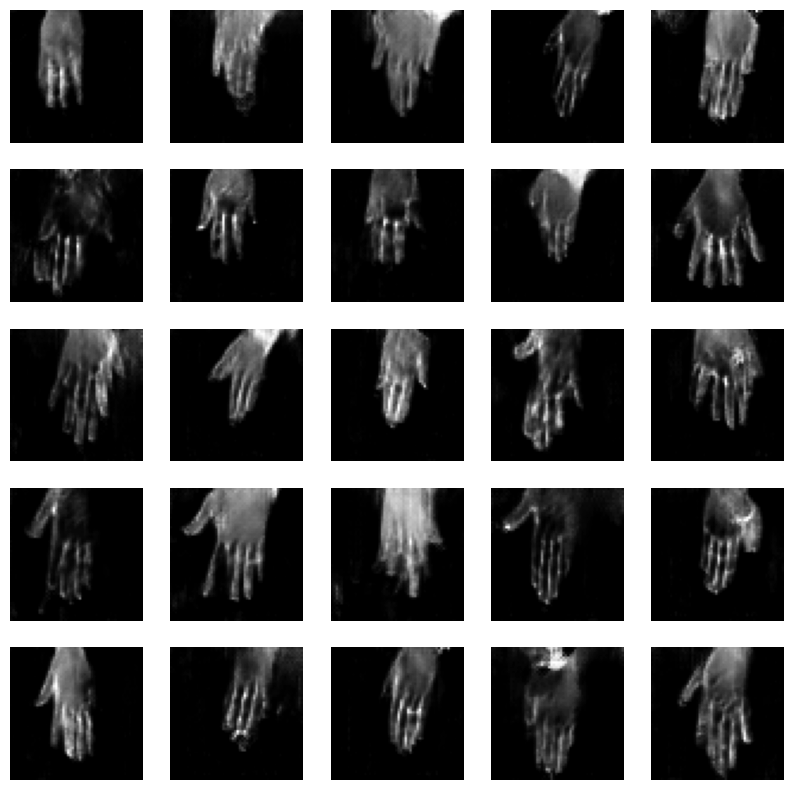

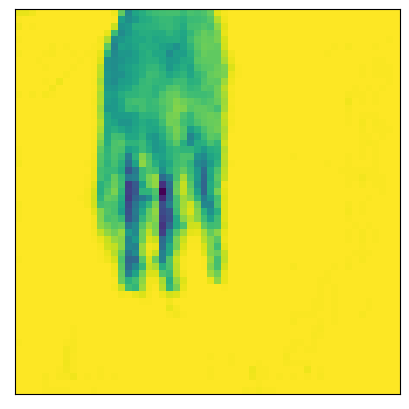

Wall time: 1h 25min 39s


In [15]:
%%time 
train_dcgan(gan, train_dataset, batch_size, random_noise_size, epochs=700)

TEST ETMEK

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor([[0.3453177]], shape=(1, 1), dtype=float32)
(1, 56, 56, 3)
(56, 56, 3)


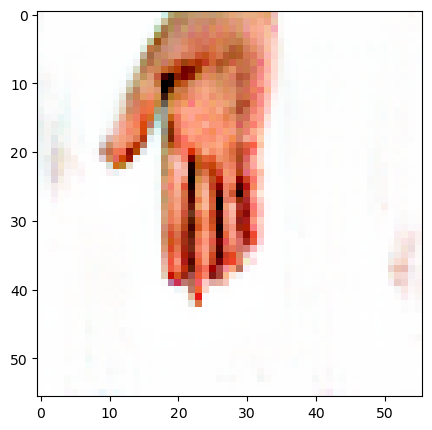

In [59]:
noise = tf.random.normal(shape=[1, random_noise_size])
generated_image = generator(noise)
t=discriminator(generated_image)
print(t)
print(generated_image.shape)
generated_image = tf.reshape(generated_image,(56,56,3))
print(generated_image.shape)
plt.figure(figsize=(5,5))
plt.imshow(generated_image)
